## Вычисление арксинуса без стресса (об одной задаче из лекции)

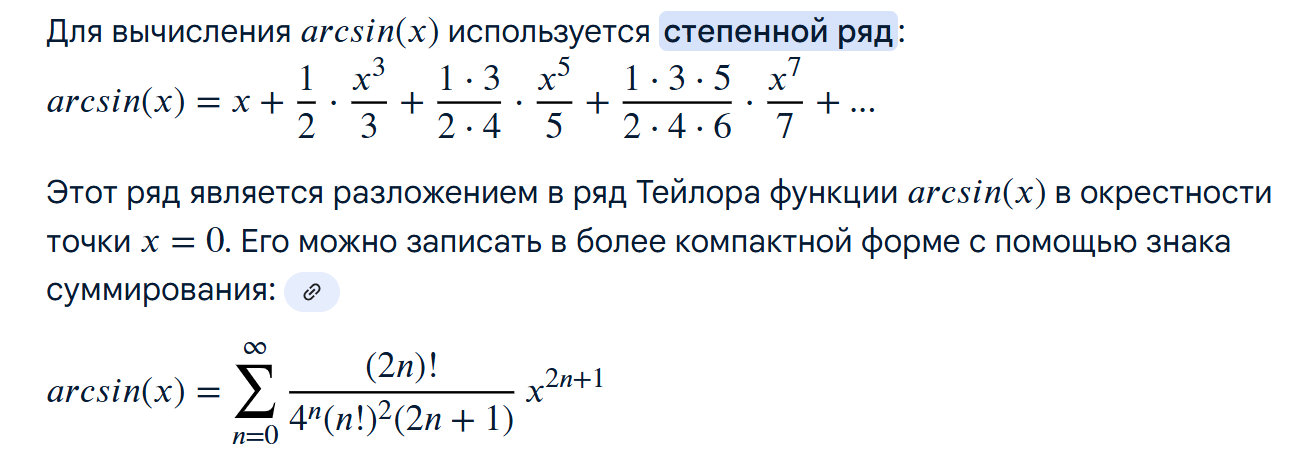

**Решение.** Выпишем последовательно несколько первых слагаемых 
$$
 y_0 = x,\quad y_1 =\frac12\cdot\frac{x^3}{3},\quad y_2=\frac{1\cdot 3}{2\cdot 4}\cdot \frac{x^5}{5},\quad
 y_3 =  \frac{1\cdot 3\cdot 5}{2\cdot 4\cdot 6}\cdot \frac{x^7}{7},\dots
$$

Представим $y_3$  в виде $y_3 = y_2\cdot $*Множитель*
$$
 y_3 =  \frac{1\cdot 3\cdot 5}{2\cdot 4\cdot 6}\cdot \frac{x^7}{7} = \left(\frac{1\cdot 3}{2\cdot 4}\cdot \frac{x^5}{5}\right) \cdot \frac{5}{6}\cdot x^2 \cdot \frac{5}{7}  = y_2 \cdot x^2\cdot \frac{5^2}{6\cdot 7}.
$$
Формируем рекуррентное выражение для $y_i$
$$
  y_{i} = y_{i-1}x^2\frac{(2i-1)^2}{2i(2i+1)}.
$$

**Окончательно, тройка формул для вычисления:**
$$
  y_0 = x,\quad  y_{i} = y_{i-1}x^2\frac{(2i-1)^2}{2i(2i+1)},\quad i=1, 2,\dots
$$
Программа пишется *строго* по этим формулам

In [4]:
from math import asin

EPS = 1e-5   # Место описания константы ЗДЕСЬ, см. правила PEP-8 и замечания ниже в файле

x = float(input('x >>> '))

#==== Далее идёт единый алгоритм для решения задачи. Не надо строки 8 и 9 отрывать от кода
s = 0
y, i = x, 0
while abs(y) >= EPS:
    s += y
    i += 1
    y = y * x*x * (2*i-1)*(2*i-1) / (2*i) / (2*i+1)
# === Закончился код для решения задачи. Пропускаем строку и печатаем ответ
    
print('s  = %8.5f' % s)   # арксинус, посчитанный по нашей формуле
print('as = %8.5f' % asin(x))  # функция из модуля math


x >>> 0.5
s  =  0.52360
as =  0.52360


**Проверка с помощью sympy**. Записываем непосредственно формулу, стоящую под знаком $\sum$ (см. условие выше)

In [3]:
from sympy import *

x = float(input('x >>> '))

xx = Symbol('x')
n = Symbol('n')

s = Sum(factorial(2*n)/4**n / factorial(n)**2 / (2*n+1) * xx**(2*n+1), (n, 0, oo))

res = s.subs(xx, x).evalf(5)  # подстановка значения x
pprint(s)

print(res)

x >>> 0.5
  ∞                      
_____                    
╲                        
 ╲                       
  ╲    -n  2⋅n + 1       
   ╲  4  ⋅x       ⋅(2⋅n)!
   ╱  ───────────────────
  ╱                  2   
 ╱       (2⋅n + 1)⋅n!    
╱                        
‾‾‾‾‾                    
n = 0                    
0.52360


# Внимание

Господа, я поняла, откуда Ваш некачественный код... Прошу всех моих студентов руководствоваться на занятих реальными правилами оформления кода на языке Python (изучайте PEP-8). Вот то, что я постоянно говорю вам на занятиях про константы (см., например, https://realpython.com/python-constants/).


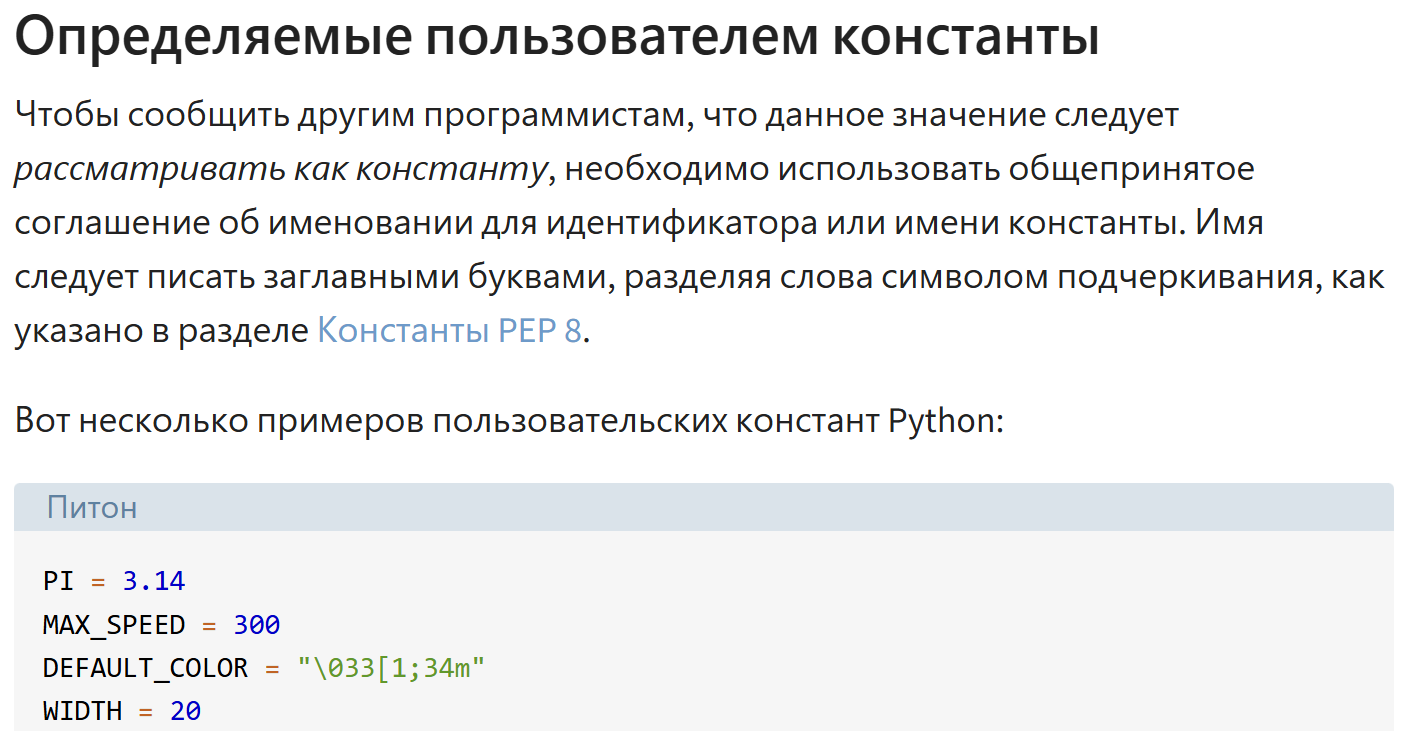

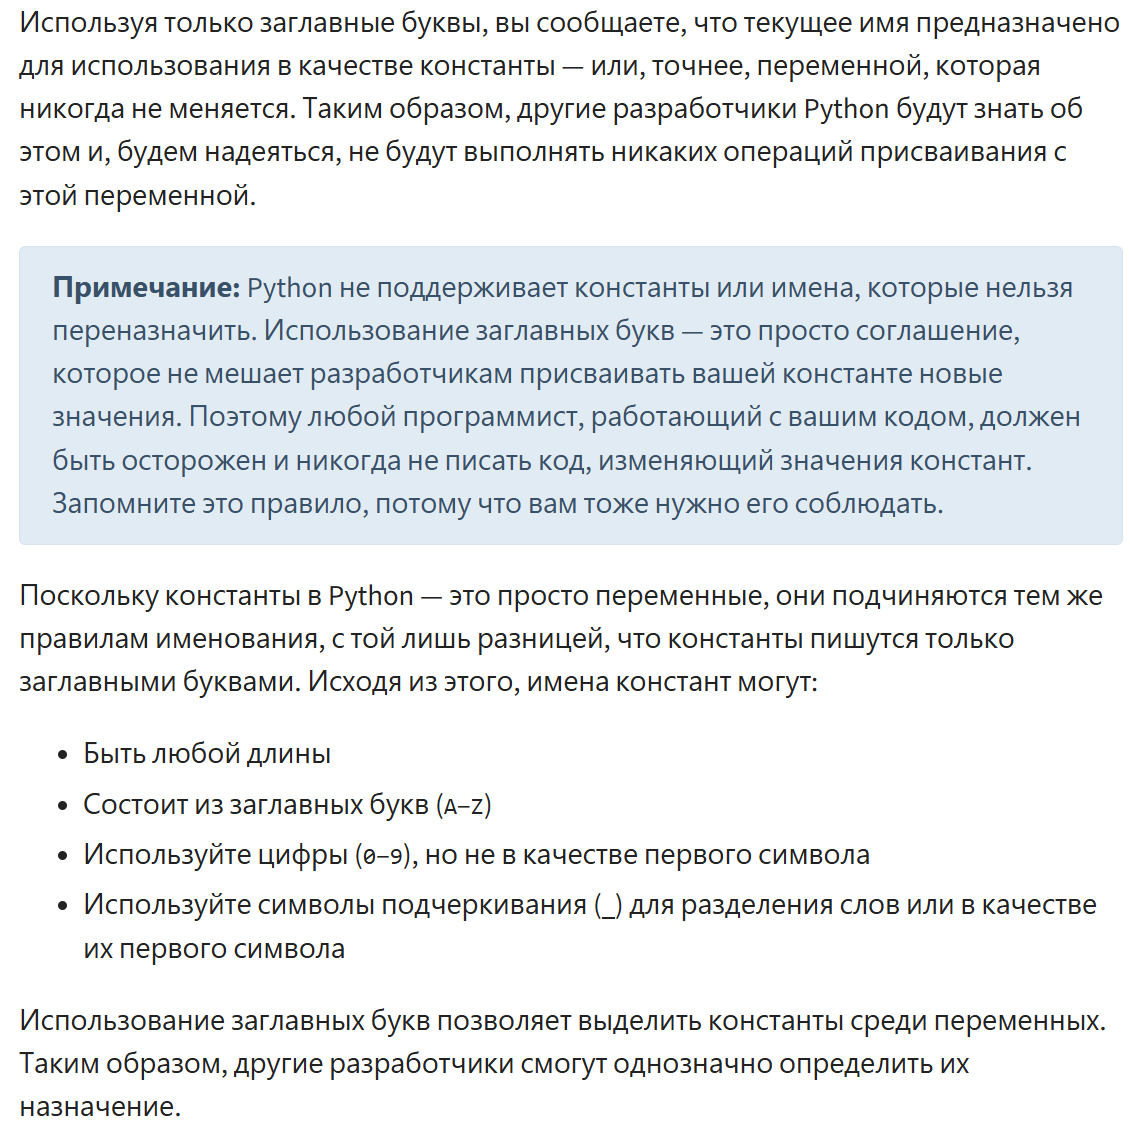

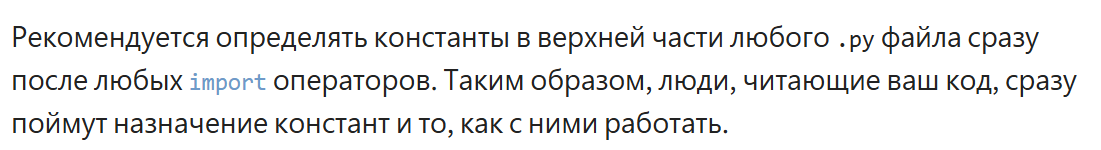

# Ещё раз о пробелах в выражениях (выдержка из PEP-8)

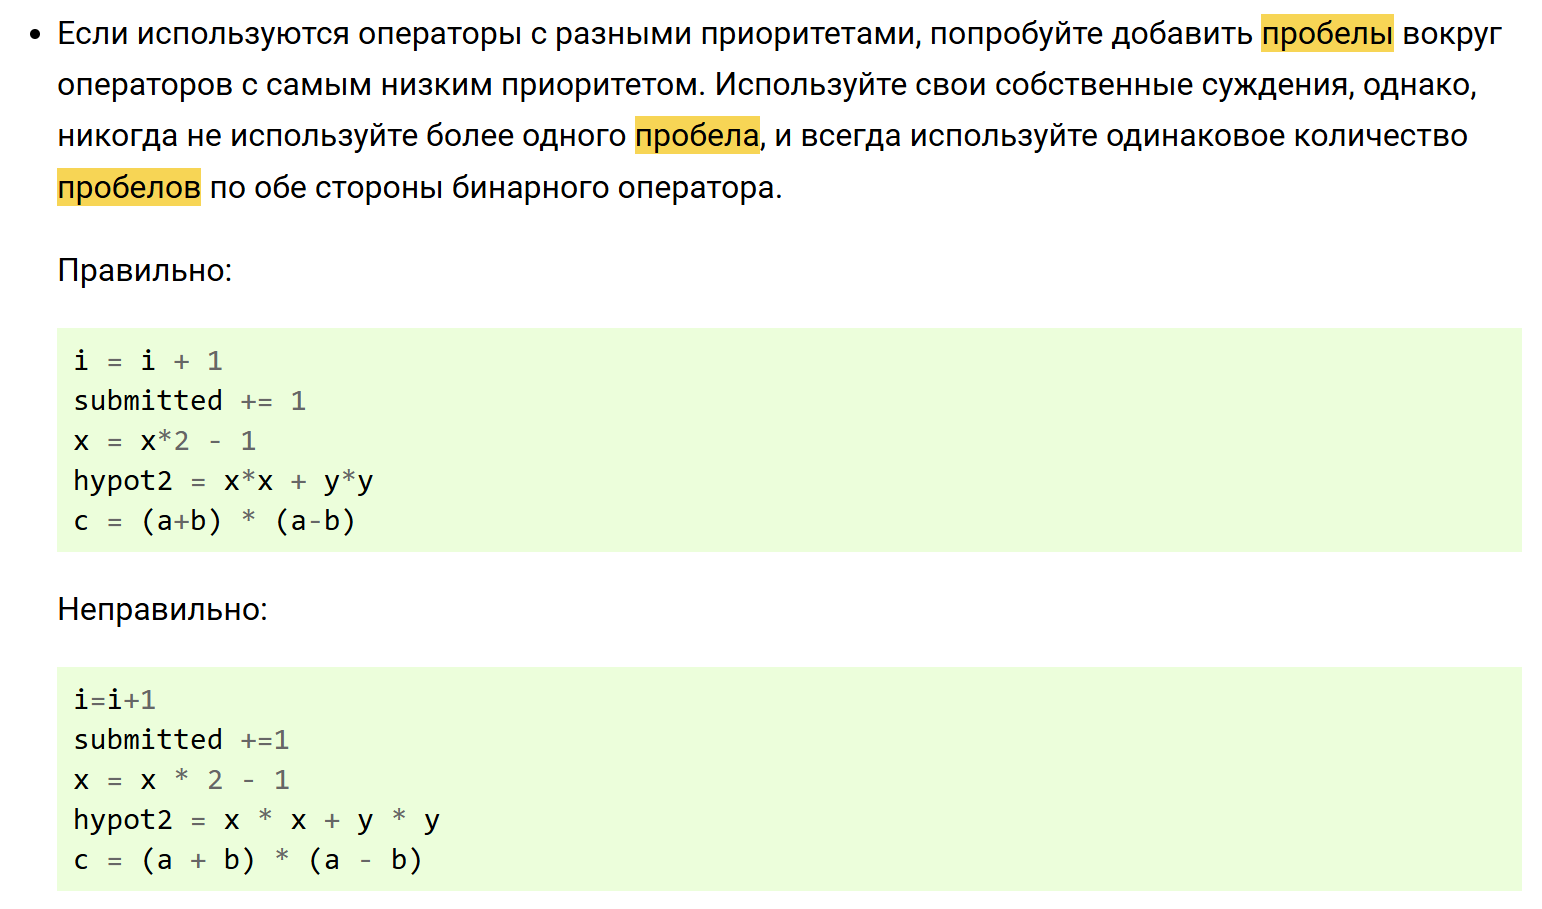